# UAS AI Lanjut

- Nama: Mohamad Doddy Sujatmiko
- NIM: 21.11.4344

## Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv('./mental-health-corpus.csv')
df_positives = df[df['label'] == 1].head(12000)
df_negatives = df[df['label'] == 0].head(12000)
df = pd.concat([df_positives, df_negatives], ignore_index=True)

## EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    24000 non-null  object
 1   label   24000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 375.1+ KB


In [3]:
df.head()

,text,label
0,nothing look forward lifei dont many reasons k...,1
1,im done trying feel betterthe reason im still ...,1
2,worried year old girl subject domestic physic...,1
3,hey rredflag sure right place post this goes ...,1
4,deserve liveif died right noone would carei re...,1


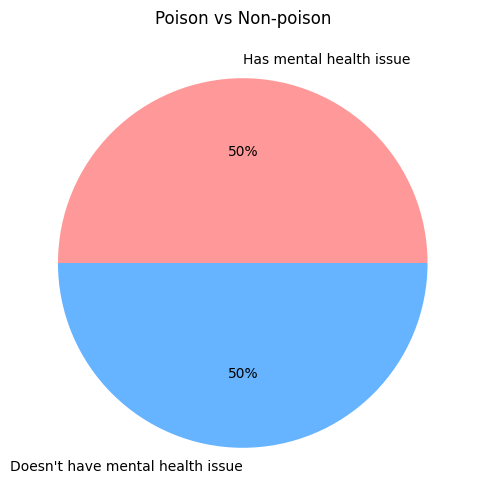

In [4]:
import matplotlib.pyplot as plt

# Prepare data for pie chart
labels = ['Has mental health issue', 'Doesn\'t have mental health issue']
sizes = [df[df['label'] == 1]['label'].count(), df[df['label'] == 0]['label'].count()]
colors = ['#ff9999', '#66b3ff']

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', colors=colors)
plt.title('Poison vs Non-poison')

# Display the pie chart
plt.show()

## Preprocessing

### Mengubah kata - kata yang biasanya disingkat

In [5]:
patterns = {
      r"\bim\b": "i am",
      r"\byoure\b": "you are",
      r"\bhes\b": "he is",
      r"\bshes\b": "she is",
      r"\bwere\b": "we are",
      r"\btheyre\b": "they are",
      r"\bive\b": "i have",
      r"\byouve\b": "you have",
      r"\bweve\b": "we have",
      r"\btheyve\b": "they have",
      r"\bwasnt\b": "was not",
      r"\bwont\b": "will not",
      r"\bcant\b": "cannot",
      r"\bdont\b": "do not",
      r"\bdoesnt\b": "does not",
      r"\bdidnt\b": "did not",
      r"\bhavent\b": "have not",
      r"\bhasnt\b": "has not",
      r"\bhadnt\b": "had not",
      r"\barent\b": "are not",
      r"\bwerent\b": "were not",
      r"\bisnt\b": "is not",
      r"\byoull\b": "you will",
      r"\bwell\b": "we will",
      r"\btheyll\b": "they will",
      r"\bill\b": "i will",
      r"\bhell\b": "he will",
      r"\bshell\b": "she will",
      r"\bitll\b": "it will",
      r"\bshed\b": "she would",
      r"\bhed\b": "he would",
      r"\bid\b": "i would",
      r"\byoud\b": "you would",
      r"\bwed\b": "we would",
      r"\btheyd\b": "they would",
      r"\bcouldve\b": "could have",
      r"\bshouldve\b": "should have",
      r"\bwouldve\b": "would have",
      r"\bwhos\b": "who is",
      r"\bwhats\b": "what is",
      r"\bwheres\b": "where is",
      r"\bwhens\b": "when is",
      r"\bwhys\b": "why is",
      r"\bhows\b": "how is",
      r"\bwhod\b": "who would",
      r"\bwhatd\b": "what would",
      r"\bwhered\b": "where would",
      r"\bwhend\b": "when would",
      r"\bwhyd\b": "why would",
      r"\bhowd\b": "how would",
      r"\bwholl\b": "who will",
      r"\bwhatll\b": "what will",
      r"\bwherell\b": "where will",
      r"\bwhenll\b": "when will",
      r"\bwhyll\b": "why will",
      r"\bhowll\b": "how will",
      r"\bwhore\b": "who are",
      r"\bwhatre\b": "what are",
      r"\bwherere\b": "where are",
      r"\bwhenre\b": "when are",
      r"\bwhyre\b": "why are",
      r"\bhowre\b": "how are",
      r"\bthats\b": "that is",
      r"\bthiss\b": "this is",
      r"\btheres\b": "there is",
      r"\bheres\b": "here is",
      r"\bits\b": "it is",
      r"\bwhove\b": "who have",
      r"\bwhatve\b": "what have",
      r"\bwhereve\b": "where have",
      r"\bwhenve\b": "when have",
      r"\bwhyve\b": "why have",
      r"\bhowve\b": "how have",
      r"\bimma\b": "i am going to",
      r"\bgonna\b": "going to",
      r"\bgotta\b": "got to",
      r"\bwanna\b": "want to",
      r"\bhafta\b": "have to",
      r"\bkinda\b": "kind of",
      r"\bsorta\b": "sort of",
      r"\blemme\b": "let me",
      r"\boutta\b": "out of",
      r"\bgotcha\b": "got you",
    }

df['text'] = df['text'].replace(patterns, regex=True)

### Tokenisasi

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\doddy-s\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\doddy-s\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.tokenize import word_tokenize

df['text'] = df['text'].apply(lambda x: word_tokenize(x))

In [8]:
df.head()

,text,label
0,"[nothing, look, forward, lifei, do, not, many,...",1
1,"[i, am, done, trying, feel, betterthe, reason,...",1
2,"[worried, year, old, girl, subject, domestic, ...",1
3,"[hey, rredflag, sure, right, place, post, this...",1
4,"[deserve, liveif, died, right, noone, would, c...",1


### Menghapus Stopword

In [9]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [10]:
df.head()

,text,label
0,"[nothing, look, forward, lifei, many, reasons,...",1
1,"[done, trying, feel, betterthe, reason, still,...",1
2,"[worried, year, old, girl, subject, domestic, ...",1
3,"[hey, rredflag, sure, right, place, post, goes...",1
4,"[deserve, liveif, died, right, noone, would, c...",1


### Mencari banyaknya kata yang ada pada dataset

In [11]:
words_array = []

for words in df['text'].values:
    words_array += words

In [12]:
longest_text = len(set(words_array))
longest_text

66143

### Mencari text terpanjang

In [14]:
df['array_length'] = df['text'].apply(len)

# Find the index of the row with the maximum array length
max_index = df['array_length'].idxmax()

# Get the longest array from the 'filtered_tokens' column
longest_array = len(df.at[max_index, 'text'])

longest_array

2438

### Menambahkan padding

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = longest_text  # Adjust based on your dataset size
max_len = longest_array # Adjust based on the average length of your text

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['text'])

X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=max_len)

### Split data

In [18]:
from sklearn.model_selection import train_test_split

y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model dan Training

In [23]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=32, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
480/480 [==============================] - 46s 93ms/step - loss: 0.3212 - accuracy: 0.8576 - val_loss: 0.2155 - val_accuracy: 0.9135
Epoch 2/5
480/480 [==============================] - 45s 93ms/step - loss: 0.1445 - accuracy: 0.9470 - val_loss: 0.2190 - val_accuracy: 0.9086
Epoch 3/5
480/480 [==============================] - 46s 96ms/step - loss: 0.0767 - accuracy: 0.9753 - val_loss: 0.2456 - val_accuracy: 0.9086
Epoch 4/5
480/480 [==============================] - 47s 98ms/step - loss: 0.0335 - accuracy: 0.9909 - val_loss: 0.3128 - val_accuracy: 0.9029
Epoch 5/5
480/480 [==============================] - 46s 96ms/step - loss: 0.0125 - accuracy: 0.9972 - val_loss: 0.3598 - val_accuracy: 0.8987


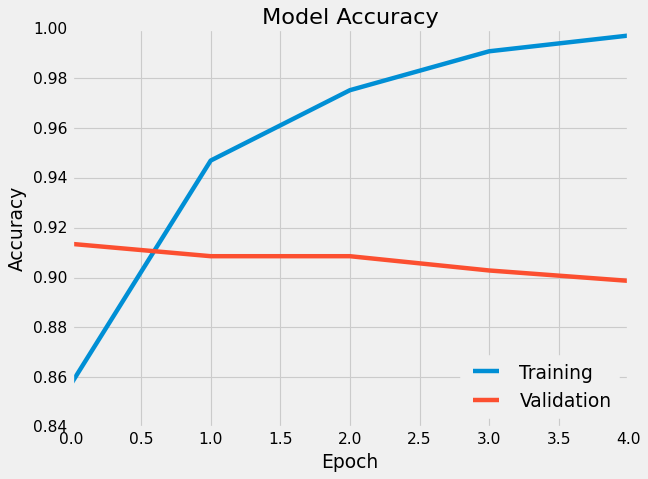

In [32]:
plt.style.use('fast')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'lower right')
plt.show()

## Validasi

In [20]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

150/150 [==============================] - 1s 8ms/step - loss: 0.2689 - accuracy: 0.9135
Test Accuracy: 91.35%


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2438, 32)          2116576   
                                                                 
 flatten (Flatten)           (None, 78016)             0         
                                                                 
 dense (Dense)               (None, 64)                4993088   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7109729 (27.12 MB)
Trainable params: 7109729 (27.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
import numpy as np

def predict_label_input(model, tokenizer, max_len):
    while True:
        # Get input text from the user
        input_text = input("Enter the text you want to classify (type 'exit' to stop): ")

        # Check if the user wants to exit
        if input_text.lower() == 'exit':
            print("Exiting the prediction loop.")
            break

        # Preprocess the input text
        sequence = tokenizer.texts_to_sequences([input_text])
        padded_sequence = pad_sequences(sequence, maxlen=max_len)

        # Make the prediction
        prediction = model.predict(padded_sequence)

        # Convert the prediction to a binary label
        label = 'mental health issue indicated' if prediction > 0.5 else 'mental health issue not indicated'

        print(f"Input Text: \'{input_text}\'")
        print(f"Predicted : {label}, Confidence: {prediction[0, 0]}")
        print("------------------------")

# Assuming 'model', 'tokenizer', and 'max_len' are already defined from the previous code

# Example usage:
predict_label_input(model, tokenizer, max_len)


1/1 [==============================] - 0s 31ms/step
Input Text: 'i feel nothing worth in my life anymore'
Predicted : mental health issue indicated, Confidence: 0.9142345190048218
------------------------
1/1 [==============================] - 0s 23ms/step
Input Text: 'i just got a new job with high salary'
Predicted : mental health issue indicated, Confidence: 0.6233750581741333
------------------------
1/1 [==============================] - 0s 36ms/step
Input Text: 'i feel good after workout outdoor'
Predicted : mental health issue not indicated, Confidence: 0.005263080820441246
------------------------
Exiting the prediction loop.
